In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-dataset/train_cancer/benign/20.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/6.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/30.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/38.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/42.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/33.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/35.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/41.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/29.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/23.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/7.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/28.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/22.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/40.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/24.jpg
/kaggle/input/skin-cancer-dataset/train_cancer/benign/13.jpg
/kaggle/input/skin-cancer-

In [2]:
# importing useful libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
import tensorflow as tf
import os
from PIL import Image
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [3]:
# creating a function to load the datasets

def load_images(path):
    images = []
    
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except OSError as e:
            print(f"Error loading {os.path.join(path, filename)}: {e}")
            continue
    return images

In [4]:
benign = load_images('/kaggle/input/skin-cancer-dataset/train_cancer/benign')
malignant = load_images('/kaggle/input/skin-cancer-dataset/train_cancer/malignant')

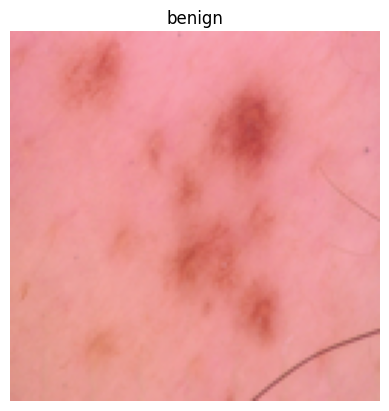

<Figure size 500x500 with 0 Axes>

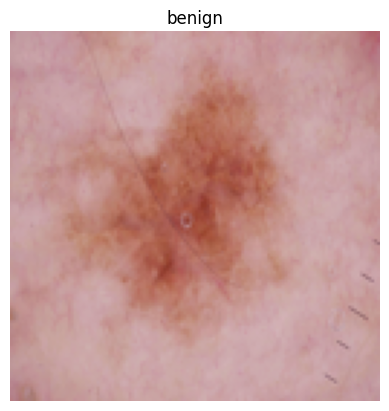

<Figure size 500x500 with 0 Axes>

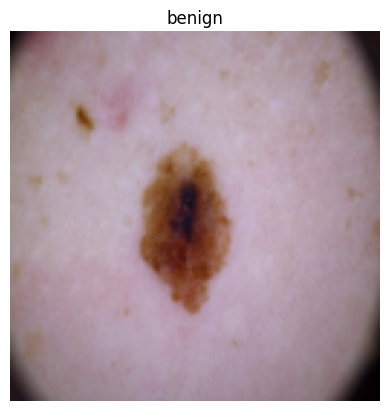

<Figure size 500x500 with 0 Axes>

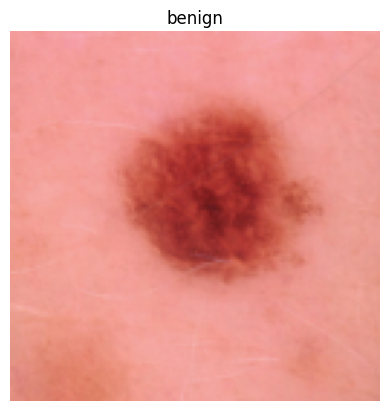

<Figure size 500x500 with 0 Axes>

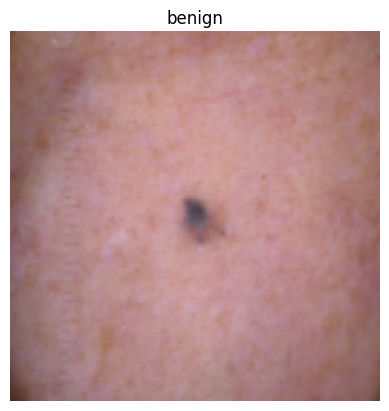

<Figure size 500x500 with 0 Axes>

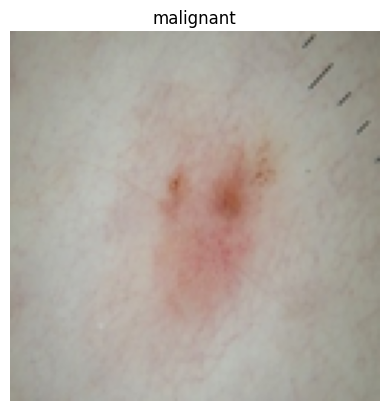

<Figure size 500x500 with 0 Axes>

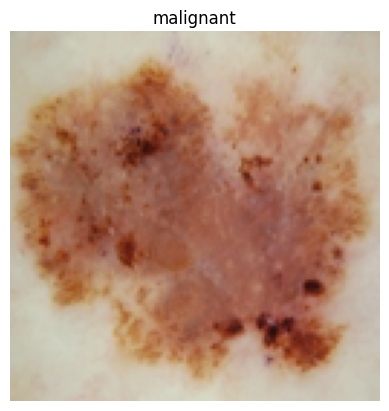

<Figure size 500x500 with 0 Axes>

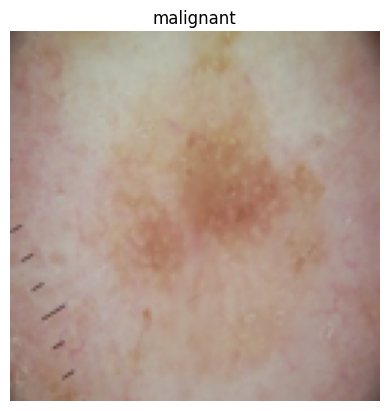

<Figure size 500x500 with 0 Axes>

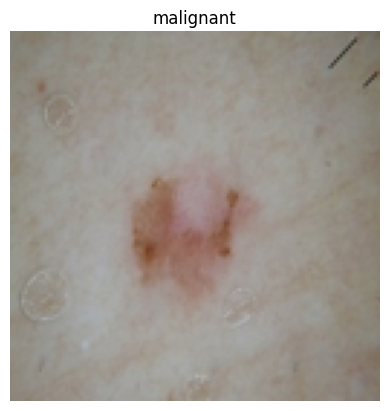

<Figure size 500x500 with 0 Axes>

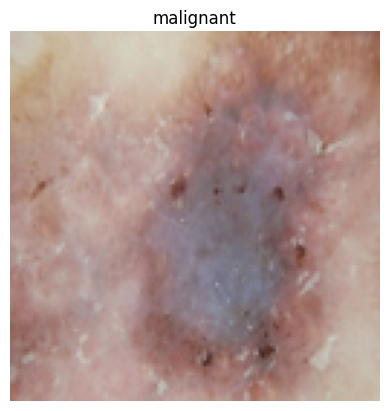

<Figure size 500x500 with 0 Axes>

In [5]:
for k,v in {'benign': benign[:5], 'malignant': malignant[:5]}.items():
    for i in v:
        plt.imshow(i)
        plt.title(label = k)
        plt.axis('off')
        plt.figure(figsize = (5,5))
        plt.tight_layout()
        plt.show()

In [6]:
np.shape(benign)

(30, 128, 128, 3)

In [7]:
# Creating the datasets
X = np.concatenate((benign, malignant))
y = np.concatenate((np.ones(len(benign)), np.zeros(len(malignant))))

In [8]:
print(f'% of benign: {(100*len(benign)/len(X)):.2f}/ % of malignant: {100*len(malignant)/len(X):.2f}')
print(f'n° of instances: {len(X)}')

% of benign: 11.11/ % of malignant: 88.89
n° of instances: 270


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                 train_size = 0.8,
                                                 shuffle =True,
                                                 random_state = 10)

In [45]:
y_train[:5]

array([0., 0., 0., 0., 0.])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size = 7)

In [13]:
# creating a basic cvnn model

tf.random.set_seed(1)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size=7, activation = 'relu', padding = "same", input_shape = [128,128,3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=3, activation = 'relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,513,217 (36.29 MB)

 Trainable params: 9,513,217 (36.29 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.layers

[<Conv2D name=conv2d_6, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Conv2D name=conv2d_7, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Conv2D name=conv2d_9, built=True>,
 <Conv2D name=conv2d_10, built=True>,
 <MaxPooling2D name=max_pooling2d_6, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.8681 - loss: 0.4855 - val_accuracy: 0.8889 - val_loss: 0.3496
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.8609 - loss: 0.4152 - val_accuracy: 0.8889 - val_loss: 0.5226
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.8690 - loss: 0.5941 - val_accuracy: 0.8889 - val_loss: 0.4216
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.8716 - loss: 0.4404 - val_accuracy: 0.8889 - val_loss: 0.3356
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.8716 - loss: 0.4510 - val_accuracy: 0.8889 - val_loss: 0.3143
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.8716 - loss: 0.3888 - val_accuracy: 0.8889 - val_loss: 0.3121
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.8716 - loss: 0.4245 - val_accuracy: 0.8889 - val_loss: 0.4058
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.8716 - loss: 0.4322 - val_accuracy: 0.8889 - val_loss: 0.3083
Epoch 9/

In [24]:
model.evaluate(X_val,y_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 946ms/step - accuracy: 0.8947 - loss: 0.2930


[0.3049449324607849, 0.8888888955116272]

**O resultado foi apenas um pouco melhor do que um classificador nulo.**